In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()
# looks like some data is missing in Age column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Now look at some plots to explore the dataset

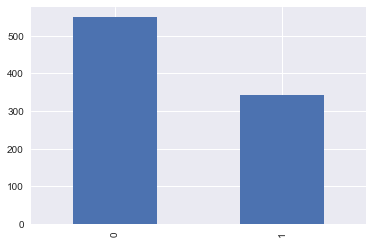

In [7]:
# This is the target column.
df.Survived.value_counts().plot(kind="bar")

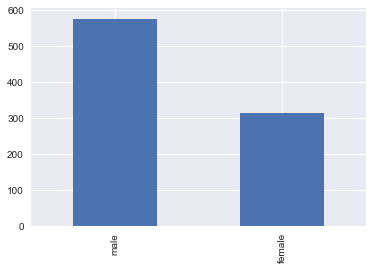

In [8]:
# More males than females
df.Sex.value_counts().plot(kind="bar")

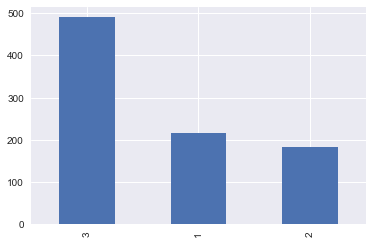

In [9]:
# Most people are in the 3rd class.
df.Pclass.value_counts().plot(kind="bar")

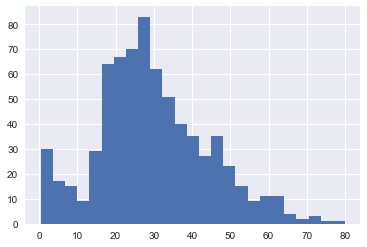

In [10]:
# Lot of poeple in 20-35 age. 
df.Age.hist(bins=25)

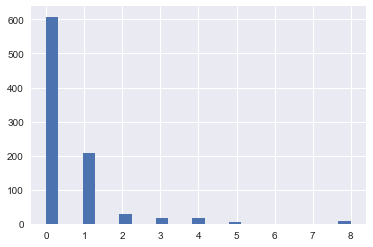

In [11]:
# Not much info from SibSp.
df.SibSp.hist(bins=25)

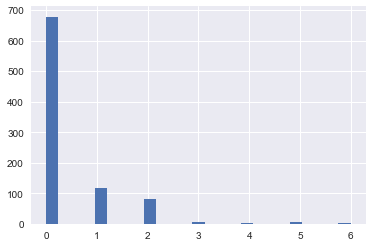

In [12]:
# Not much info from Parch.
df.Parch.hist(bins=25)

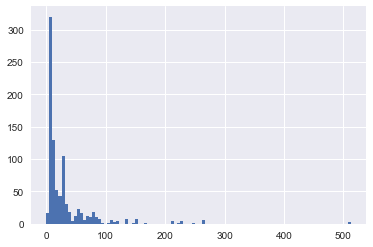

In [13]:
# Need to revisit Fare as a signal
df.Fare.hist(bins=100)

In [14]:
# Cabin data is sparse. So we can ignore it.
print df.Cabin.count()
df.Cabin.value_counts().head(5)

# We will also ignore ticket number and name

204


C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
Name: Cabin, dtype: int64

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


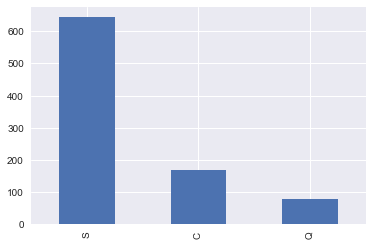

In [15]:
# Embarked information. Most people embarked from "S"
df.Embarked.value_counts().plot(kind="bar")

# Embarked is missing some data and so we can fill it with 'S' as it is where the majority of people came from
print df[df["Embarked"].isnull()]
df["Embarked"] = df["Embarked"].fillna("S")

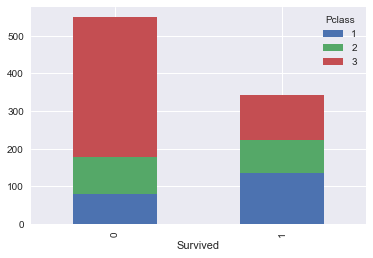

In [16]:
# It can be seen below that the people in class 3 had less chances of survival. So pclass is a good signal
df1 = pd.crosstab(df['Survived'], df['Pclass'])
df1.plot(kind="bar", stacked="True")

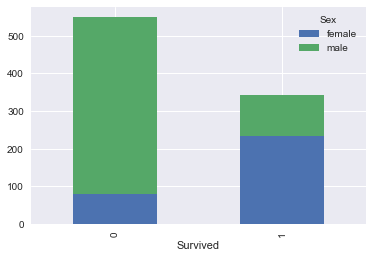

In [17]:
# More females survived than males. So sex is a good signal
df1 = pd.crosstab(df['Survived'], df['Sex'])
df1.plot(kind="bar", stacked="True")

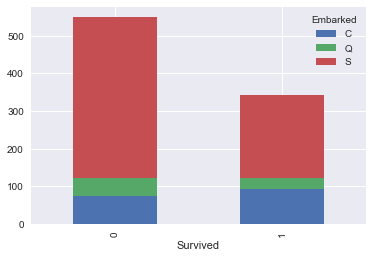

In [18]:
# Looks like if you embarked from S, you have high chances of dying (lets see how many man embarked from S)
df1 = pd.crosstab(df['Survived'], df['Embarked'])
df1.plot(kind="bar", stacked="True")

male      441
female    205
Name: Sex, dtype: int64


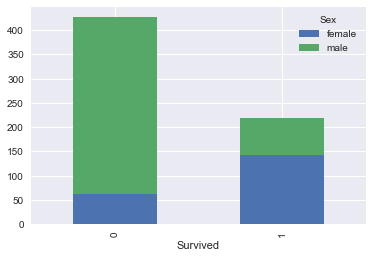

In [19]:
# lets see how many man embarked from S and survived
df1 = df[df["Embarked"] == "S"]
print df1.Sex.value_counts()
df2 = pd.crosstab(df['Survived'], df1['Sex'])
df2.plot(kind="bar", stacked="True")

In [20]:
# For the missing age, we can use fillna to be at the mean
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [21]:
# Lets see the correlation between Parch and SibSp
df.filter(items=["Parch", "SibSp"]).corr()

# We can add them together 
df['relation'] = df['Parch'] + df['SibSp']

(array([ 144.,   85.,   31.,   26.,   17.,   11.,    6.,    6.,    2.,
           0.,    3.,    3.,    5.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([   0.      ,   20.493168,   40.986336,   61.479504,   81.972672,
         102.46584 ,  122.959008,  143.452176,  163.945344,  184.438512,
         204.93168 ,  225.424848,  245.918016,  266.411184,  286.904352,
         307.39752 ,  327.890688,  348.383856,  368.877024,  389.370192,
         409.86336 ,  430.356528,  450.849696,  471.342864,  491.836032,
         512.3292  ]),
 <a list of 25 Patch objects>)

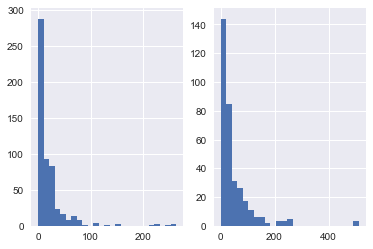

In [22]:
fig, axs = plt.subplots(1,2)
df1 = df[df["Survived"] == 0]
axs[0].hist(df1.Fare, bins=25)

df2 = df[df["Survived"] == 1]
axs[1].hist(df2.Fare, bins=25)

We looked at all the features. We will keep Pclass, Sex, Age, Embarked, Relation and Fare. We need to convert Sex & Embarked to numeric

In [35]:
finalDf = df[["Survived", "Pclass", "Sex", "Age", "Embarked", "relation", "Fare"]]
trainingDf = pd.get_dummies(finalDf, columns=["Sex", "Embarked"])

In [56]:
def clean_data(df):
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df['relation'] = df['Parch'] + df['SibSp']
    df["Embarked"] = df["Embarked"].fillna("S")
    finalDf = df[["PassengerId", "Pclass", "Sex", "Age", "Embarked", "relation", "Fare"]]
    trainingDf = pd.get_dummies(finalDf, columns=["Sex", "Embarked"])
    return trainingDf

In [75]:
# Prepare the data for training
print trainingDf.shape
training_data = trainingDf.values
print training_data

train_features = training_data[:, 1:]
train_target = training_data[:, 0]

(891, 10)
[[  0.           3.          22.         ...,   0.           0.           1.        ]
 [  1.           1.          38.         ...,   1.           0.           0.        ]
 [  1.           3.          26.         ...,   0.           0.           1.        ]
 ..., 
 [  0.           3.          29.69911765 ...,   0.           0.           1.        ]
 [  1.           1.          26.         ...,   1.           0.           0.        ]
 [  0.           3.          32.         ...,   0.           1.           0.        ]]


In [76]:
# We will use a random forest classifier model
from sklearn.ensemble import RandomForestClassifier
ml = RandomForestClassifier(n_estimators=100)

In [77]:
# apply the model
model = ml.fit(train_features, train_target)
score = model.score(train_features, train_target)
print "The score is " + str(score)

The score is 0.982042648709


In [78]:
# Lets predict and see our accuracy 
df_test = pd.read_csv('test.csv')
print df_test.info()
df_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
# Clean the data. So we need to pass it through a function to get the values 
df_test_processed = clean_data(df_test)
print df_test_processed.shape

df_test_processed_vals = df_test_processed.values

# Removing the Id
test_x = df_test_processed_vals[:, 1:]
print test_x
# Predict the output
test_y = model.predict(test_x)

(418, 10)
[[  3.          34.5          0.         ...,   0.           1.           0.        ]
 [  3.          47.           1.         ...,   0.           0.           1.        ]
 [  2.          62.           0.         ...,   0.           1.           0.        ]
 ..., 
 [  3.          38.5          0.         ...,   0.           0.           1.        ]
 [  3.          30.27259036   0.         ...,   0.           0.           1.        ]
 [  3.          30.27259036   2.         ...,   1.           0.           0.        ]]


In [82]:
df_test['Survived'] = test_y
df_test["Survived"] = df_test["Survived"].astype(int)
df_test[['PassengerId', 'Survived']].to_csv('titanic-survival.csv', index=False)

In [83]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relation,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NaN,S,0,0
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,NaN,Q,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,NaN,S,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,NaN,C,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,NaN,S,2,0
